In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
steam_games = pd.read_csv('steam_games_all_fields.csv', index_col=0, delimiter='\t')
app_id = steam_games['steam_url'].str.split('/',expand=True)
app_id = app_id.drop([0, 1, 2, 5, 6], axis=1)
app_id.columns = ['app', 'game_ID']
df = pd.concat([steam_games, app_id], axis=1, sort=False)
df = df[~df.app.str.contains('sub')]
df = df[~df.app.str.contains('digitalgiftcards')]
df = df[~df.tags.str.contains('no_tag')]
df = df[~df.score.str.contains('no rating')]
df = df.drop(['app'], axis=1)
df['game_ID'] = pd.to_numeric(df['game_ID'], downcast='signed')
df['number_of_review'] = df['number_of_review'].replace({'no reviews' : ''})
df['number_of_review'] = pd.to_numeric(df['number_of_review'], downcast='signed')
#df['score'] = df['score'].replace({'no rating' : np.nan})
df['score'] = pd.to_numeric(df['score'])
df = df[df['score'] != 0.0]
df = df.rename(columns={"game_ID": "appid"})
df = df.drop_duplicates(subset='appid', keep='first')
df.head()

,game_title,steam_url,tags,image,description,number_of_review,score,release_date,appid
0,Counter-Strike: Global Offensive,https://store.steampowered.com/app/730/Counter...,"FPS, Multiplayer, Shooter, Action, Team-Based,...",https://steamcdn-a.akamaihd.net/steam/apps/730...,Counter-Strike: Global Offensive (CS: GO) expa...,2915091,9.0,"Aug 21, 2012",730
1,MONSTER HUNTER: WORLD,https://store.steampowered.com/app/582010/MONS...,"Action, Hunting, Co-op, Open World, Multiplaye...",https://steamcdn-a.akamaihd.net/steam/apps/582...,Welcome to a new world! In Monster Hunter: Wor...,55314,6.0,"Aug 9, 2018",582010
2,Path of Exile,https://store.steampowered.com/app/238960/Path...,"Free to Play, Action RPG, Hack and Slash, RPG,...",https://steamcdn-a.akamaihd.net/steam/apps/238...,"You are an Exile, struggling to survive on the...",74977,9.0,"Oct 23, 2013",238960
3,Insurgency: Sandstorm,https://store.steampowered.com/app/581320/Insu...,"FPS, Realistic, Shooter, Multiplayer, Action, ...",https://steamcdn-a.akamaihd.net/steam/apps/581...,"Insurgency: Sandstorm is a team-based, tactica...",9019,9.0,"Dec 12, 2018",581320
4,Warframe,https://store.steampowered.com/app/230410/Warf...,"Free to Play, Action, Co-op, Multiplayer, Thir...",https://steamcdn-a.akamaihd.net/steam/apps/230...,Warframe is a cooperative free-to-play third p...,236593,9.0,"Mar 25, 2013",230410


In [3]:
df[df['score']== 0]

,game_title,steam_url,tags,image,description,number_of_review,score,release_date,appid


In [4]:
print('Unique AppID Count: %s' % str(df.appid.nunique()))
df.describe()

Unique AppID Count: 14597


,number_of_review,score,appid
count,1.459700e+04,14597.000000,14597.000000
mean,1.709165e+03,7.381106,484589.425087
std,2.815136e+04,1.387829,231278.056772
min,1.000000e+01,2.000000,10.000000
25%,2.500000e+01,6.000000,325210.000000
50%,7.600000e+01,7.000000,465780.000000
75%,3.450000e+02,9.000000,657260.000000
max,2.915091e+06,10.000000,999200.000000


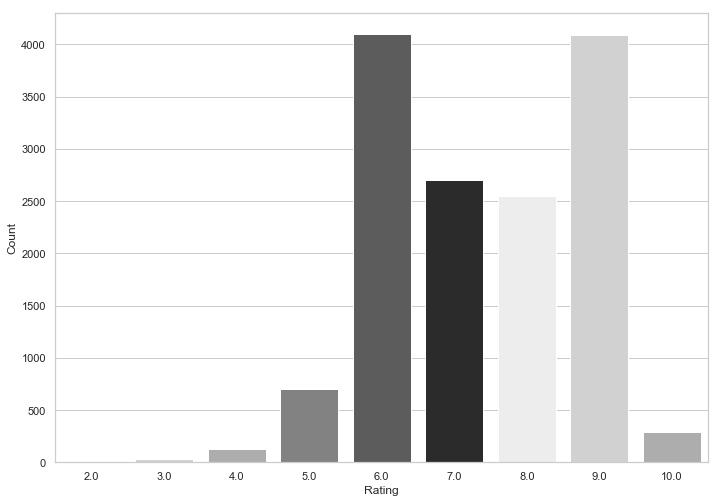

In [5]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.set_style('whitegrid')
ax = sns.countplot(x='score', data=df, palette=sns.color_palette('Greys'))
ax.set(xlabel='Rating', ylabel='Count')
plt.show()

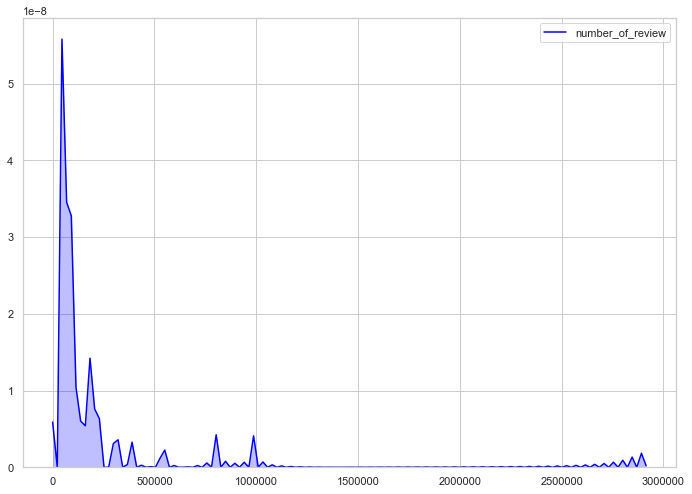

In [12]:
x = df[df['number_of_review'] > 3.450000e+02]

#x = np.random.normal(size=100) 
    
#sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.set_style('whitegrid')
ax = sns.kdeplot(df['number_of_review'], shade=True, color='blue')
#ax.set(xlabel='Rating', ylabel='Count')
plt.show()

In [18]:
engine = KNeighborsClassifier(n_neighbors=20)
data_points = df[['number_of_review', 'score']].values
labels = df.appid.values
print("Data points: ")
print(data_points)
print("Labels: ")
print(labels)

engine.fit(data_points, labels)

Data points: 
[[  2.91509100e+06   9.00000000e+00]
 [  5.53140000e+04   6.00000000e+00]
 [  7.49770000e+04   9.00000000e+00]
 ..., 
 [  2.10000000e+01   7.00000000e+00]
 [  1.00000000e+01   8.00000000e+00]
 [  1.03000000e+02   9.00000000e+00]]
Labels: 
[   730 582010 238960 ..., 986020 999200 679490]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [19]:
appid = 238960
product_data = [df.loc[appid][['number_of_review', 'score']].values]

recommended_products = engine.kneighbors(X=product_data, n_neighbors=20, return_distance=False)

# List of product IDs form the indexes

products_list = []

for each in recommended_products:
    products_list.append(df.iloc[each].index)

print("Recommended products: ")
print(products_list)

KeyError: 'the label [238960] is not in the [index]'

In [29]:
df[df['number_of_review'] > 3.450000e+02]

,game_title,steam_url,tags,image,description,number_of_review,score,release_date,appid
0,Counter-Strike: Global Offensive,https://store.steampowered.com/app/730/Counter...,"FPS, Multiplayer, Shooter, Action, Team-Based,...",https://steamcdn-a.akamaihd.net/steam/apps/730...,Counter-Strike: Global Offensive (CS: GO) expa...,2915091,9.0,"Aug 21, 2012",730
1,MONSTER HUNTER: WORLD,https://store.steampowered.com/app/582010/MONS...,"Action, Hunting, Co-op, Open World, Multiplaye...",https://steamcdn-a.akamaihd.net/steam/apps/582...,Welcome to a new world! In Monster Hunter: Wor...,55314,6.0,"Aug 9, 2018",582010
2,Path of Exile,https://store.steampowered.com/app/238960/Path...,"Free to Play, Action RPG, Hack and Slash, RPG,...",https://steamcdn-a.akamaihd.net/steam/apps/238...,"You are an Exile, struggling to survive on the...",74977,9.0,"Oct 23, 2013",238960
3,Insurgency: Sandstorm,https://store.steampowered.com/app/581320/Insu...,"FPS, Realistic, Shooter, Multiplayer, Action, ...",https://steamcdn-a.akamaihd.net/steam/apps/581...,"Insurgency: Sandstorm is a team-based, tactica...",9019,9.0,"Dec 12, 2018",581320
4,Warframe,https://store.steampowered.com/app/230410/Warf...,"Free to Play, Action, Co-op, Multiplayer, Thir...",https://steamcdn-a.akamaihd.net/steam/apps/230...,Warframe is a cooperative free-to-play third p...,236593,9.0,"Mar 25, 2013",230410
5,Divinity: Original Sin 2 - Definitive Edition,https://store.steampowered.com/app/435150/Divi...,"RPG, Turn-Based, Co-op, Story Rich, Fantasy, O...",https://steamcdn-a.akamaihd.net/steam/apps/435...,The eagerly anticipated sequel to the award-wi...,37446,9.0,"Sep 14, 2017",435150
6,Assassin's Creed® Odyssey,https://store.steampowered.com/app/812140/Assa...,"Open World, Action, RPG, Singleplayer, Adventu...",https://steamcdn-a.akamaihd.net/steam/apps/812...,Choose your fate in Assassin's Creed® Odyssey....,14907,9.0,"Oct 5, 2018",812140
7,Rocket League®,https://store.steampowered.com/app/252950/Rock...,"Multiplayer, Racing, Soccer, Sports, Competiti...",https://steamcdn-a.akamaihd.net/steam/apps/252...,Soccer meets driving once again in the long-aw...,182330,9.0,"Jul 7, 2015",252950
8,Tom Clancy's Rainbow Six® Siege,https://store.steampowered.com/app/359550/Tom_...,"FPS, Multiplayer, Tactical, Shooter, Action, T...",https://steamcdn-a.akamaihd.net/steam/apps/359...,Tom Clancy's Rainbow Six Siege is the latest i...,224822,9.0,"Dec 1, 2015",359550
9,Grand Theft Auto V,https://store.steampowered.com/app/271590/Gran...,"Open World, Action, Multiplayer, Third Person,...",https://steamcdn-a.akamaihd.net/steam/apps/271...,"Los Santos is a city of bright lights, long ni...",386027,6.0,"Apr 14, 2015",271590


In [19]:
games = interface('IPlayerService').GetOwnedGames(steamid=76561197974553664, include_appinfo=1)
my_games = games['response']['games']
game_table = pd.DataFrame(my_games)
game_table = game_table.sort_values(by=['playtime_forever'], ascending=False)
game_table = game_table.fillna(0)
game_table = game_table.drop(['has_community_visible_stats', 'img_icon_url', 'img_logo_url'], axis=1)

In [20]:
game_table.head(10)

,appid,name,playtime_2weeks,playtime_forever
145,252950,Rocket League,0.0,11114
224,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,0.0,8114
188,377160,Fallout 4,39.0,5246
20,24960,Battlefield: Bad Company 2,0.0,5108
165,287700,METAL GEAR SOLID V: THE PHANTOM PAIN,4.0,4702
205,268500,XCOM 2,0.0,3164
85,49520,Borderlands 2,0.0,3131
189,236870,HITMAN™,0.0,2947
24,8930,Sid Meier's Civilization V,0.0,2855
215,385760,NBA 2K17,0.0,2537


In [23]:
pd.merge(game_table, game_tags, on='appid')

,appid,name,playtime_2weeks,playtime_forever,steam_tags
0,252950,Rocket League,0.0,11114,"Multiplayer, Racing, Soccer, Sports, Competiti..."
1,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,0.0,8114,"Survival, Shooter, Multiplayer, PvP, Third-Per..."
2,377160,Fallout 4,39.0,5246,"Open World, Post-apocalyptic, Exploration, Sin..."
3,24960,Battlefield: Bad Company 2,0.0,5108,"FPS, Multiplayer, Action, Shooter, Team-Based,..."
4,287700,METAL GEAR SOLID V: THE PHANTOM PAIN,4.0,4702,"Stealth, Open World, Story Rich, Action, Tacti..."
5,268500,XCOM 2,0.0,3164,"Strategy, Turn-Based, Tactical, Turn-Based Str..."
6,49520,Borderlands 2,0.0,3131,"FPS, Co-op, RPG, Action, Loot, Shooter, Open W..."
7,236870,HITMAN™,0.0,2947,"Stealth, Action, Assassin, Third Person, Singl..."
8,8930,Sid Meier's Civilization V,0.0,2855,"Turn-Based Strategy, Strategy, Turn-Based, Mul..."
9,385760,NBA 2K17,0.0,2537,"Basketball, Sports, Multiplayer, Simulation, S..."


In [27]:
steam_games.score.unique()

array(['9.0', '6.0', '10.0', '7.0', '5.0', 'no rating', '0.0', '8.0',
       '2.0', '4.0', '3.0'], dtype=object)